Please run those two cells before running the Notebook!

As those plotting settings are standard throughout the book, we do not show them in the book every time we plot something.

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# feel free to modify, for example, change the context to "notebook"
sns.set_theme(context="talk", style="whitegrid", 
              palette="colorblind", color_codes=True, 
              rc={"figure.figsize": [12, 8]})

# Chapter 5 - Technical Analysis and Building Interactive Dashboards

## 5.1 Calculating the most popular technical indicators

### How to do it...

1. Import the libraries:

In [1]:
import pandas as pd 
import yfinance as yf
import talib

2. Download IBM's stock prices from 2020:

In [2]:
df = yf.download("IBM", 
                 start="2020-01-01", 
                 end="2020-12-31",
                 progress=False,
                 auto_adjust=True)
df

,Open,High,Low,Close,Volume
Date,,,,,
2019-12-31,111.899486,113.241979,111.789722,113.174423,3951265
2020-01-02,113.984998,114.761790,113.790806,114.339622,3293436
2020-01-03,112.777584,113.866779,112.769141,113.427727,2482890
2020-01-06,112.650947,113.343297,112.465191,113.225098,2537073
2020-01-07,112.878911,113.951214,112.634056,113.301071,3232977
...,...,...,...,...,...
2020-12-23,110.081419,111.263278,109.957013,110.099190,2817819
2020-12-24,111.076660,111.165523,110.374657,110.801186,1842111
2020-12-28,111.165528,112.498442,110.596815,110.916718,3781499


3. Calculate and plot the Simple Moving Average:

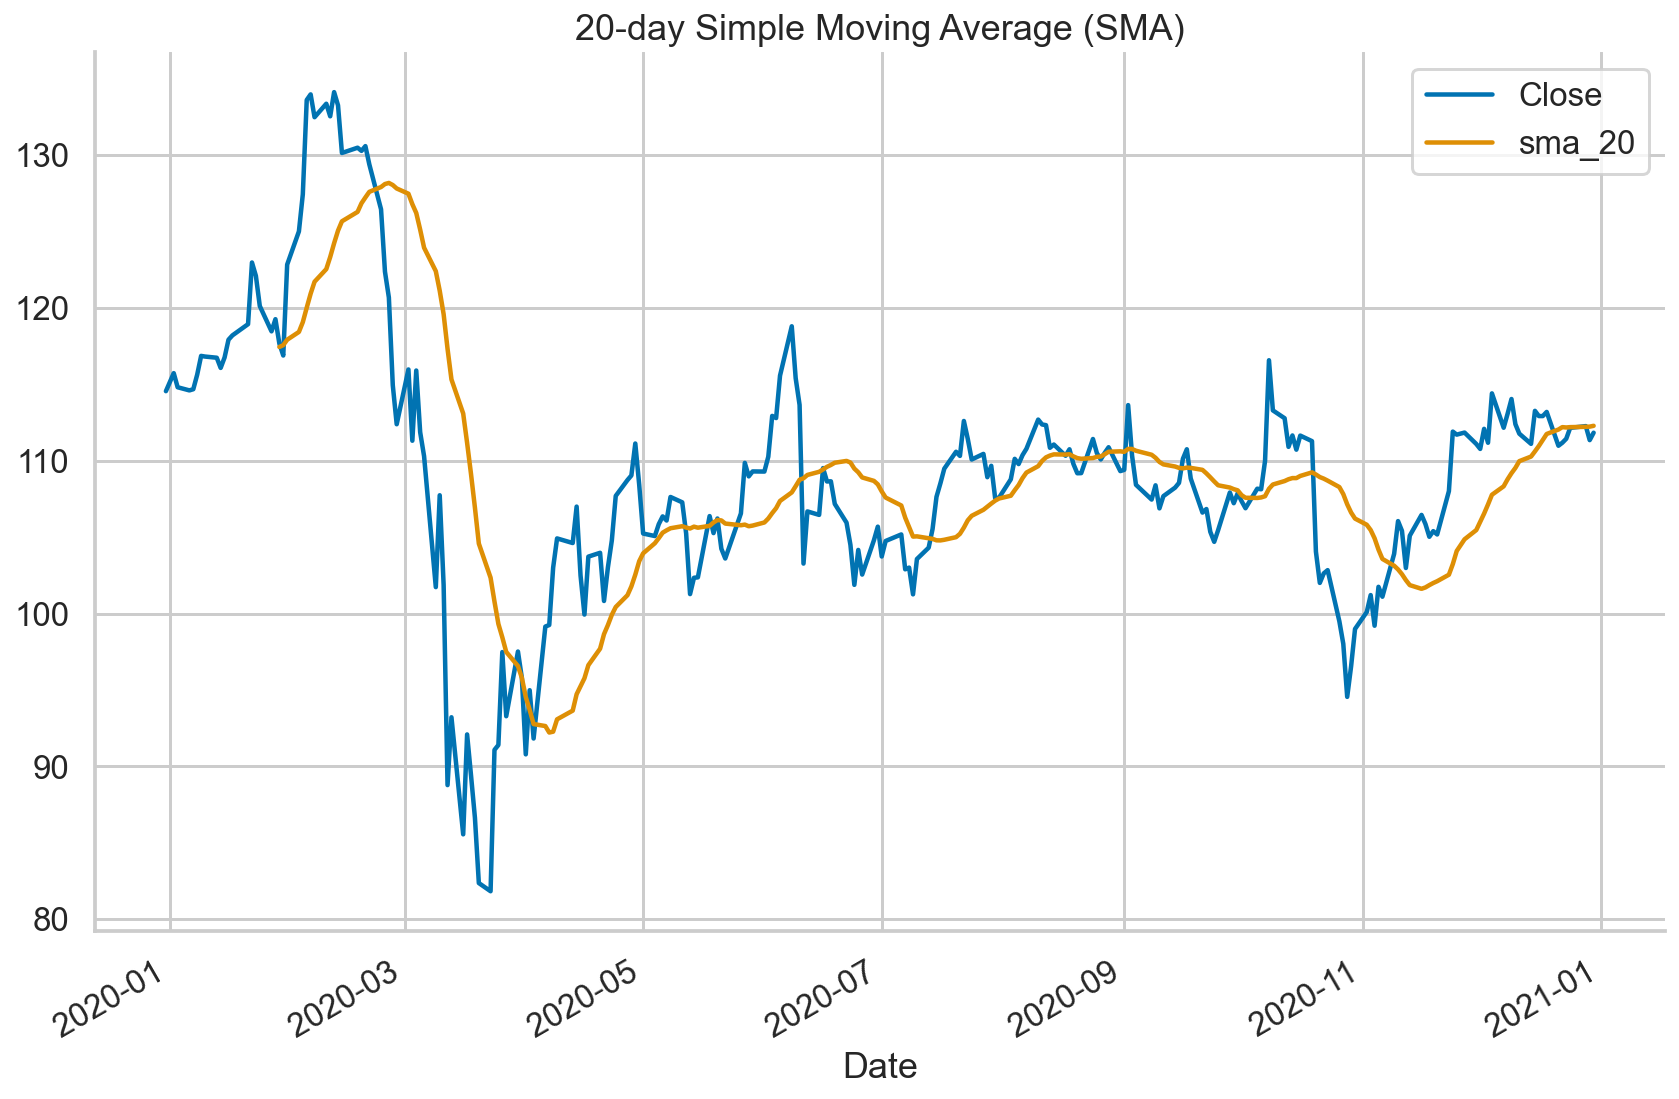

In [30]:
df["sma_20"] = talib.SMA(df["Close"], timeperiod=20)
(
    df[["Close", "sma_20"]]
    .plot(title="20-day Simple Moving Average (SMA)")
)

sns.despine()
plt.tight_layout()
# plt.savefig("images/figure_5_1", dpi=200)

4. Calculate and plot the Bollinger bands:

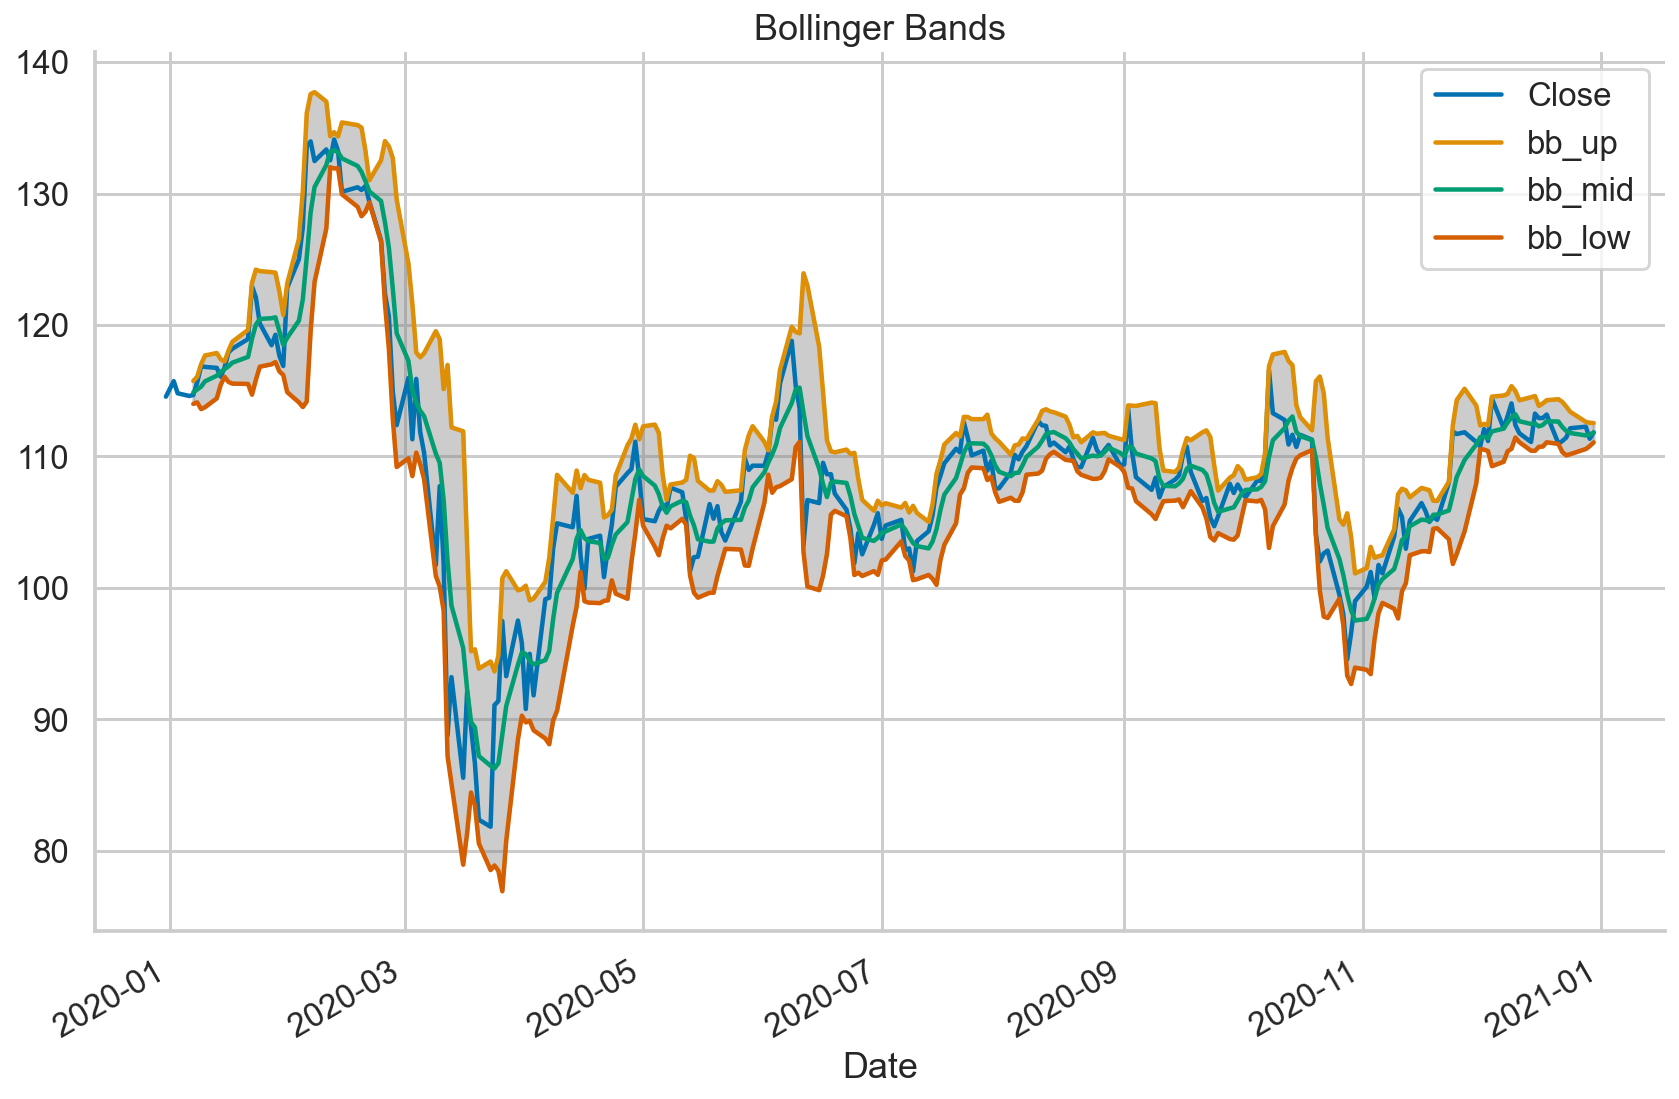

In [31]:
df["bb_up"], df["bb_mid"], df["bb_low"] = talib.BBANDS(df["Close"])

fig, ax = plt.subplots()

(
    df.loc[:, ["Close", "bb_up", "bb_mid", "bb_low"]]
    .plot(ax=ax, title="Bollinger Bands")
)

ax.fill_between(df.index, df["bb_low"], df["bb_up"], 
                color="gray", 
                alpha=.4)

sns.despine()
plt.tight_layout()
# plt.savefig("images/figure_5_2", dpi=200)

5. Calculate and plot the RSI:

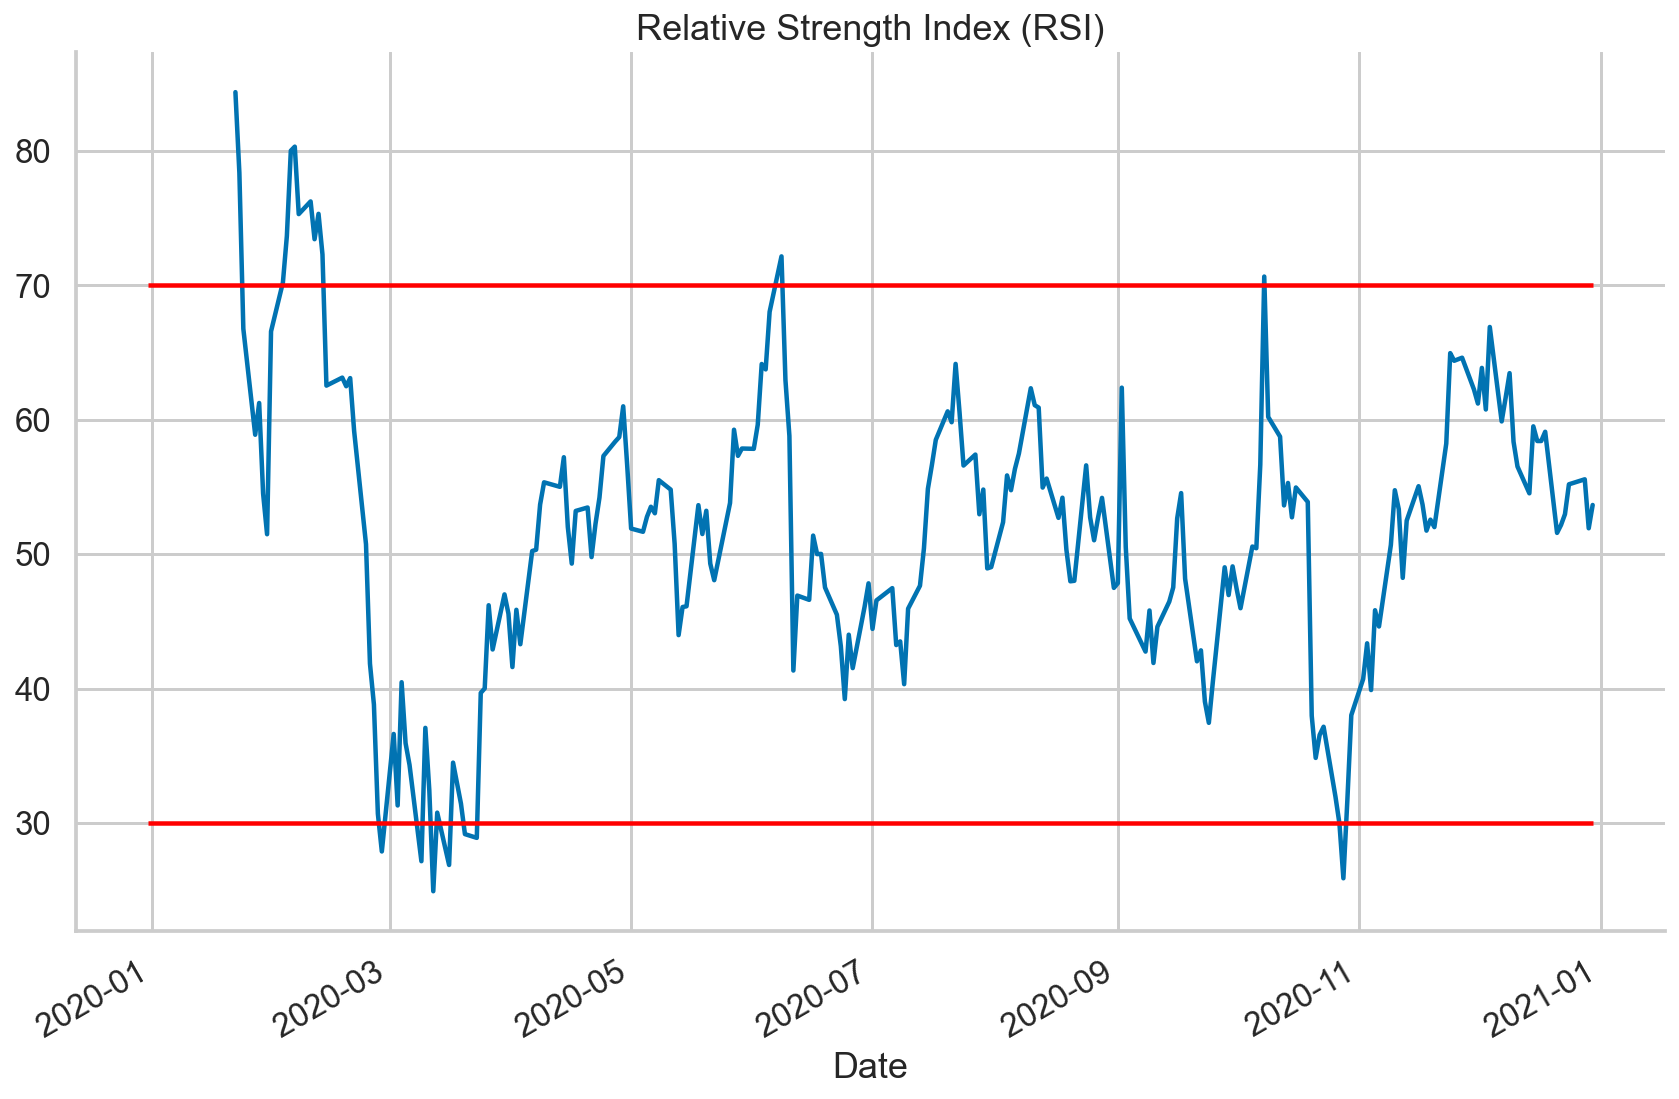

In [32]:
df["rsi"] = talib.RSI(df["Close"])

fig, ax = plt.subplots()
df["rsi"].plot(ax=ax, 
               title="Relative Strength Index (RSI)")
ax.hlines(y=30, 
          xmin=df.index.min(), 
          xmax=df.index.max(), 
          color="red")
ax.hlines(y=70, 
          xmin=df.index.min(), 
          xmax=df.index.max(), 
          color="red")

sns.despine()
plt.tight_layout()
# plt.savefig("images/figure_5_3", dpi=200)

6. Calculate and plot the MACD:

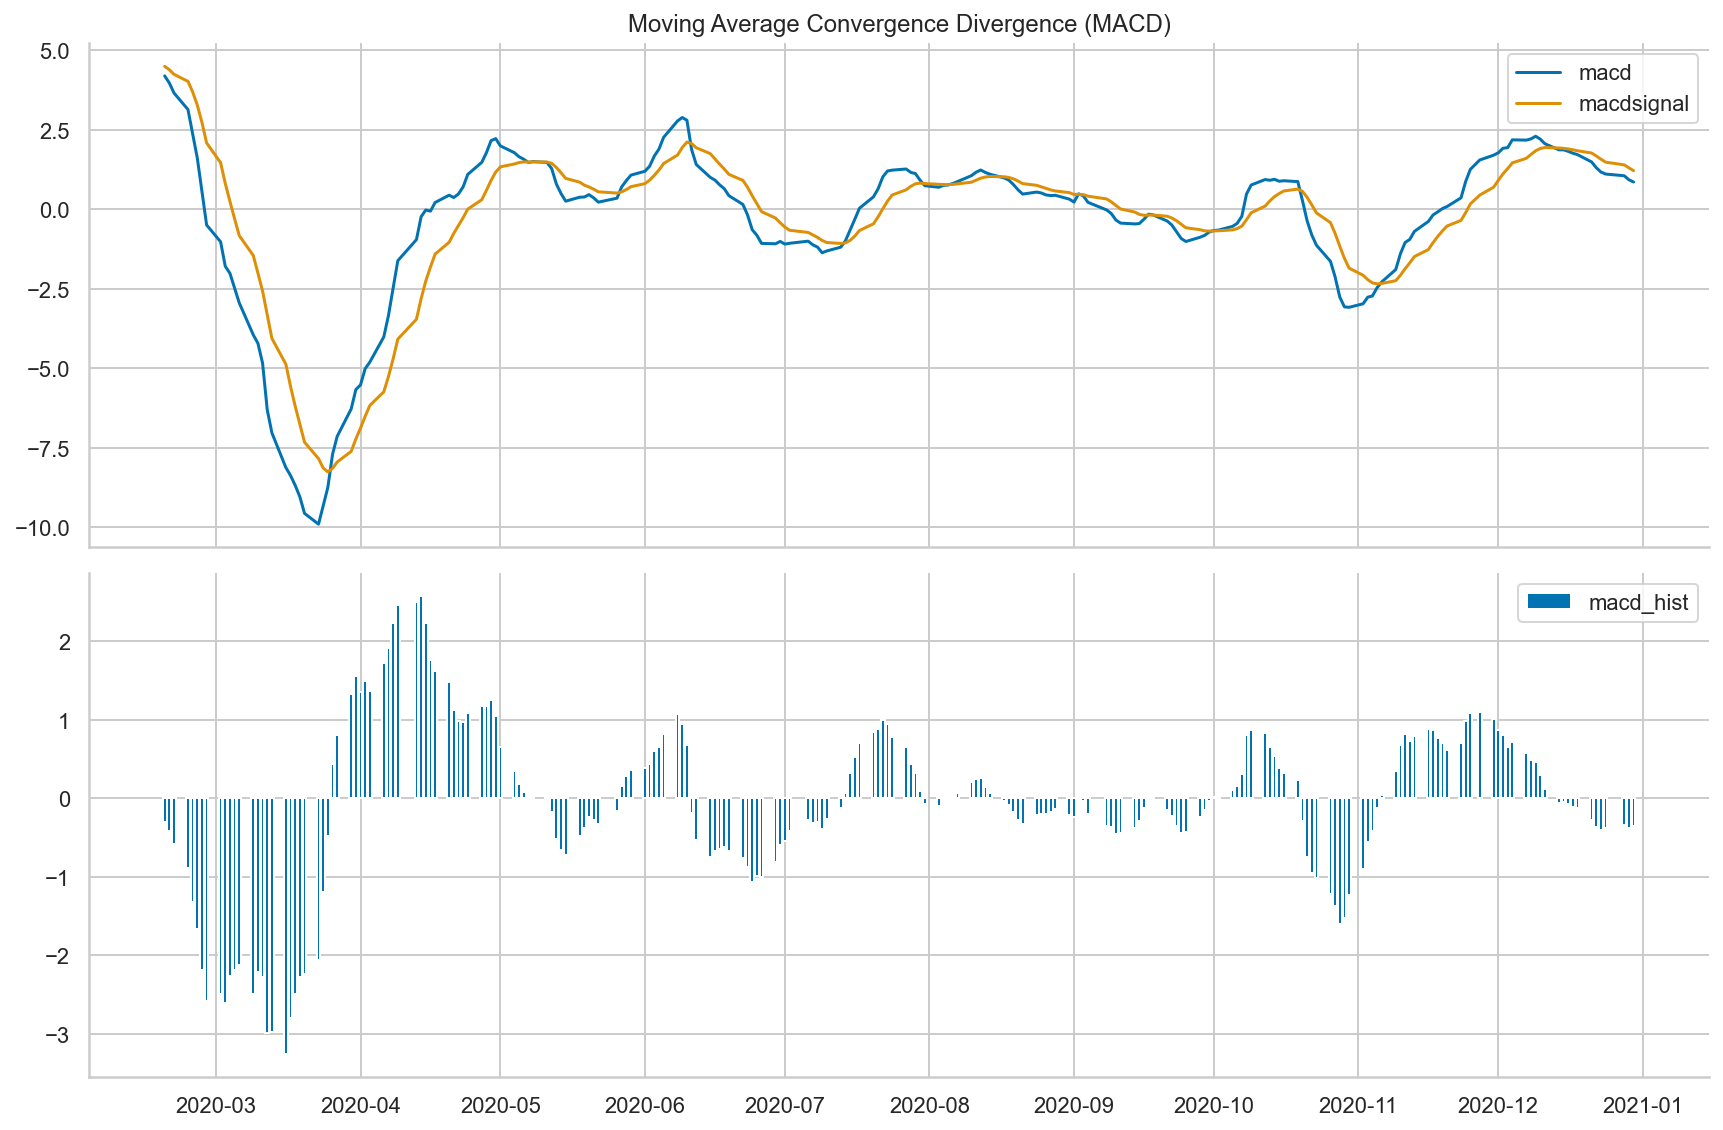

In [6]:
df["macd"], df["macdsignal"], df["macdhist"] = talib.MACD(
    df["Close"], fastperiod=12, slowperiod=26, signalperiod=9
)

with sns.plotting_context("notebook"):
    fig, ax = plt.subplots(2, 1, sharex=True)

    (
        df[["macd", "macdsignal"]].
        plot(ax=ax[0],
             title="Moving Average Convergence Divergence (MACD)")
    )
    ax[1].bar(df.index, df["macdhist"].values, label="macd_hist")
    ax[1].legend()

    sns.despine()
    plt.tight_layout()
    # plt.savefig("images/figure_5_4", dpi=200)


### There's more

1. Import the libraries:

In [34]:
from ta import add_all_ta_features


2. Discard the previously calculated indicators and keep only the required columns:

In [35]:
df = df[["Open", "High", "Low", "Close", "Volume"]].copy()

3. Calculate all the technical indicators available in the `ta` library:

In [36]:
df = add_all_ta_features(df, open="Open", high="High", 
                         low="Low", close="Close", 
                         volume="Volume")

/opt/homebrew/Caskroom/miniforge/base/envs/pff2/lib/python3.9/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/opt/homebrew/Caskroom/miniforge/base/envs/pff2/lib/python3.9/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


In [37]:
df.shape

(253, 88)

In [38]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'volume_adi', 'volume_obv',
       'volume_cmf', 'volume_fi', 'volume_mfi', 'volume_em', 'volume_sma_em',
       'volume_vpt', 'volume_nvi', 'volume_vwap', 'volatility_atr',
       'volatility_bbm', 'volatility_bbh', 'volatility_bbl', 'volatility_bbw',
       'volatility_bbp', 'volatility_bbhi', 'volatility_bbli',
       'volatility_kcc', 'volatility_kch', 'volatility_kcl', 'volatility_kcw',
       'volatility_kcp', 'volatility_kchi', 'volatility_kcli',
       'volatility_dcl', 'volatility_dch', 'volatility_dcm', 'volatility_dcw',
       'volatility_dcp', 'volatility_ui', 'trend_macd', 'trend_macd_signal',
       'trend_macd_diff', 'trend_sma_fast', 'trend_sma_slow', 'trend_ema_fast',
       'trend_ema_slow', 'trend_adx', 'trend_adx_pos', 'trend_adx_neg',
       'trend_vortex_ind_pos', 'trend_vortex_ind_neg', 'trend_vortex_ind_diff',
       'trend_trix', 'trend_mass_index', 'trend_cci', 'trend_dpo', 'trend_kst',
       'trend_kst_sig', '

## 5.2 Downloading the technical indicators

### How to do it...

1. Import the libraries:

In [39]:
from alpha_vantage.techindicators import TechIndicators

2. Instantiate the `TechIndicators` class and authenticate:

In [40]:
ta_api = TechIndicators(key="YOUR_KEY_HERE", 
                        output_format="pandas")

3. Download the RSI for IBM's stock:

In [41]:
rsi_df, rsi_meta = ta_api.get_rsi(symbol="IBM", 
                                  time_period=14)

4. Plot the downloaded RSI:

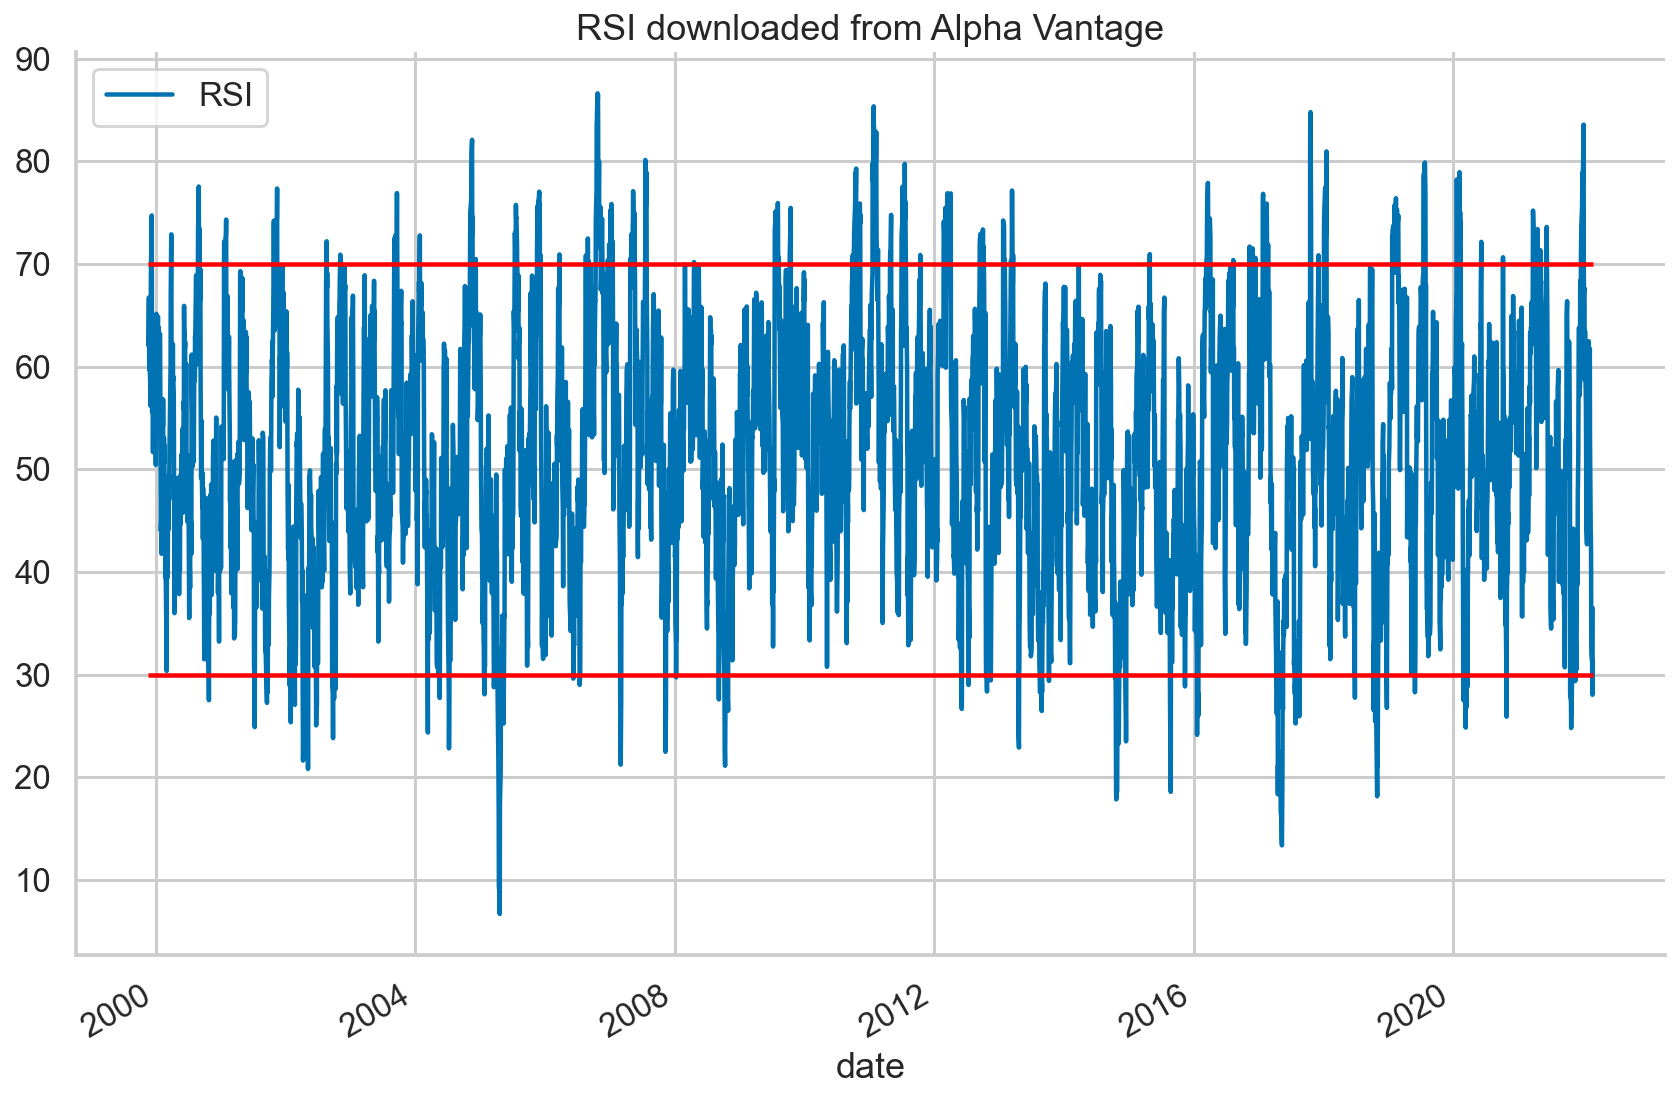

In [42]:
fig, ax = plt.subplots()
rsi_df.plot(ax=ax, 
            title="RSI downloaded from Alpha Vantage")
ax.hlines(y=30, 
          xmin=rsi_df.index.min(), 
          xmax=rsi_df.index.max(), 
          color="red")
ax.hlines(y=70, 
          xmin=rsi_df.index.min(), 
          xmax=rsi_df.index.max(), 
          color="red")

sns.despine()
plt.tight_layout()
# plt.savefig("images/figure_5_5", dpi=200)

In [43]:
rsi_df

,RSI
date,
1999-11-19,62.0696
1999-11-22,66.7188
1999-11-23,62.8952
1999-11-24,59.7185
1999-11-26,60.4087
...,...
2022-02-18,31.9383
2022-02-22,31.2024
2022-02-23,28.1928


5. Explore the metadata object:

In [44]:
rsi_meta

{'1: Symbol': 'IBM',
 '2: Indicator': 'Relative Strength Index (RSI)',
 '3: Last Refreshed': '2022-02-25',
 '4: Interval': 'daily',
 '5: Time Period': 14,
 '6: Series Type': 'close',
 '7: Time Zone': 'US/Eastern Time'}

### There's more

1. Import the libraries:

In [45]:
import intrinio_sdk as intrinio

2. Authenticate using the personal API key and select the API:

In [46]:
intrinio.ApiClient().set_api_key("YOUR_KEY_HERE") 
security_api = intrinio.SecurityApi()

3. Request the MACD for IBM's stock from 2020:

In [47]:
r = security_api.get_security_price_technicals_macd(
    identifier="IBM", 
    fast_period=12, 
    slow_period=26, 
    signal_period=9, 
    price_key="close", 
    start_date="2020-01-01", 
    end_date="2020-12-31",
    page_size=500
)

4. Convert the request's output into a `pandas` DataFrame:

In [48]:
macd_df = (
    pd.DataFrame(r.technicals_dict)
    .sort_values("date_time")
    .set_index("date_time")
)
macd_df.index = pd.to_datetime(macd_df.index).date
macd_df

,macd_histogram,macd_line,signal_line
2020-01-02,0.101039,-0.027359,-0.128399
2020-01-03,0.069252,-0.041833,-0.111086
2020-01-06,0.031395,-0.071842,-0.103237
2020-01-07,0.012705,-0.087355,-0.100061
2020-01-08,0.072713,-0.009169,-0.081882
...,...,...,...
2020-12-24,-0.374587,1.123076,1.497662
2020-12-28,-0.340861,1.071586,1.412447
2020-12-29,-0.379825,0.937666,1.317491
2020-12-30,-0.361885,0.865134,1.227020


5. Plot the MACD:

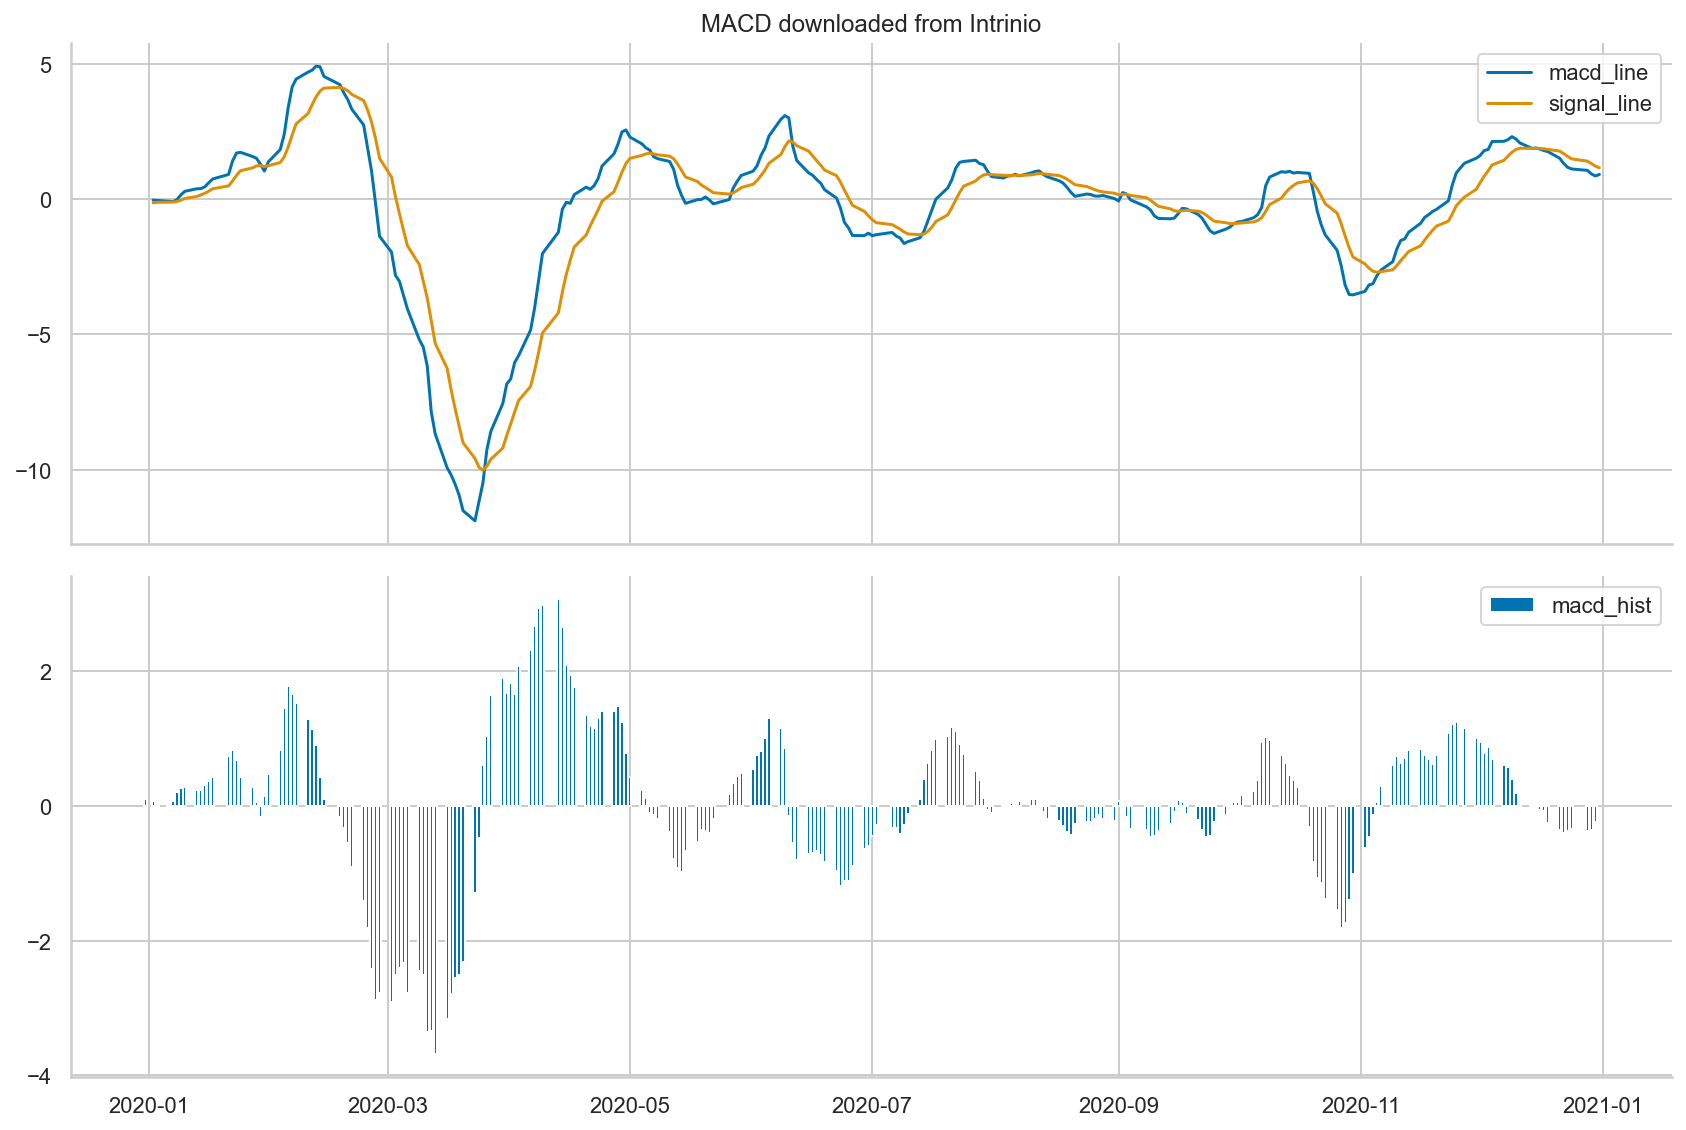

In [51]:
with sns.plotting_context("notebook"):
    
    fig, ax = plt.subplots(2, 1, sharex=True)

    (
        macd_df[["macd_line", "signal_line"]]
        .plot(ax=ax[0], 
              title="MACD downloaded from Intrinio")
    )
    ax[1].bar(df.index, macd_df["macd_histogram"].values, 
              label="macd_hist")
    ax[1].legend()

    sns.despine()
    plt.tight_layout()
    # plt.savefig("images/figure_5_6", dpi=200)

## 5.3 Recognizing candlestick patterns

### How to do it...

1. Import the libraries:

In [1]:
import pandas as pd 
import yfinance as yf
import talib
import mplfinance as mpf

2. Download Bitcoin's hourly prices from the last 3 months:

In [16]:
df = yf.download("BTC-USD", 
                 period="9mo",
                 interval="1h",
                 progress=False)
df

,Open,High,Low,Close,Adj Close,Volume
2021-05-26 21:00:00+00:00,38803.769531,39203.167969,38647.078125,39088.601562,39088.601562,0
2021-05-26 22:00:00+00:00,39116.933594,39143.957031,38881.089844,38916.472656,38916.472656,0
2021-05-27 00:00:00+00:00,39316.890625,39316.890625,38533.253906,38730.640625,38730.640625,0
2021-05-27 01:00:00+00:00,38700.968750,38739.441406,37610.296875,37652.078125,37652.078125,4886528
2021-05-27 02:00:00+00:00,37684.550781,38032.914062,37595.847656,37855.457031,37855.457031,0
...,...,...,...,...,...,...
2022-02-26 17:00:00+00:00,39168.746094,39276.929688,39132.628906,39270.863281,39270.863281,0
2022-02-26 18:00:00+00:00,39260.035156,39261.429688,38927.933594,39082.492188,39082.492188,0
2022-02-26 19:00:00+00:00,39086.562500,39338.273438,39086.562500,39278.535156,39278.535156,0
2022-02-26 20:00:00+00:00,39274.378906,39389.812500,39259.558594,39366.855469,39366.855469,7278592


3. Identify the "Three Line Strike" pattern:

In [17]:
df["3_line_strike"] = talib.CDL3LINESTRIKE(
    df["Open"], df["High"], df["Low"], df["Close"]
)

4. Locate and plot the bearish pattern:

In [21]:
df[df["3_line_strike"] == -100].head().round(2)

,Open,High,Low,Close,Adj Close,Volume,3_line_strike
2021-06-06 14:00:00+00:00,35655.64,36185.68,35544.90,36124.10,36124.10,131508224,-100
2021-06-13 15:00:00+00:00,35807.91,36082.75,35807.91,36082.75,36082.75,0,-100
2021-07-03 17:00:00+00:00,34546.72,34909.26,34546.72,34793.32,34793.32,24389632,-100
2021-07-08 19:00:00+00:00,32843.35,33088.62,32657.65,33013.81,33013.81,343470080,-100
2021-07-16 12:00:00+00:00,31115.04,31703.58,31115.04,31703.58,31703.58,351070208,-100


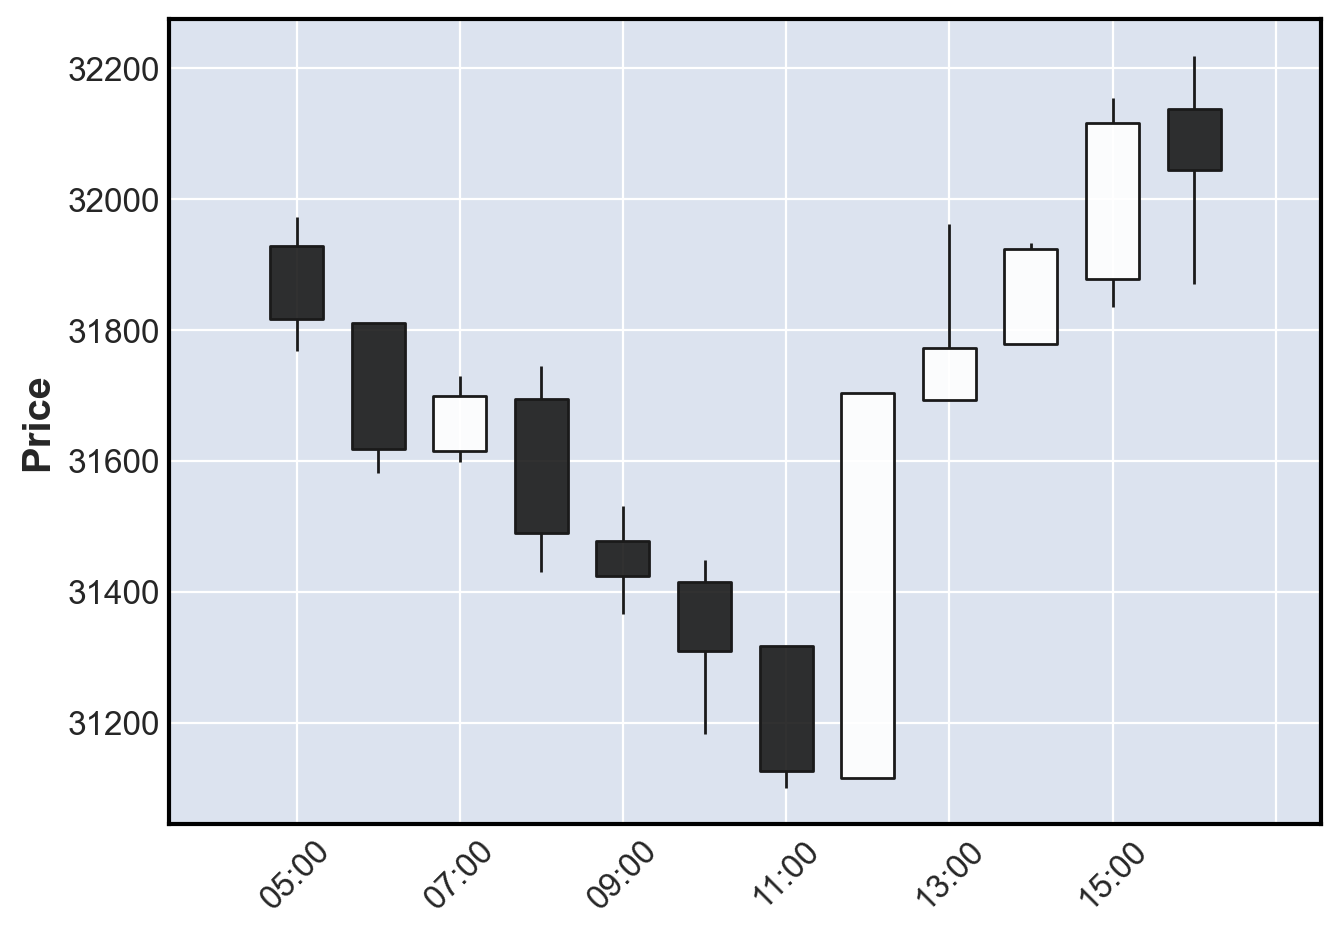

<Figure size 640x480 with 0 Axes>

In [22]:
mpf.plot(df["2021-07-16 05:00:00":"2021-07-16 16:00:00"], 
         type="candle")

5. Locate and plot the bullish pattern:

In [26]:
df[df["3_line_strike"] == 100].head().round(2)

,Open,High,Low,Close,Adj Close,Volume,3_line_strike
2021-06-08 06:00:00+00:00,32932.72,32971.01,32620.67,32637.23,32637.23,359575552,100
2021-06-30 08:00:00+00:00,35244.68,35279.57,34594.18,34654.98,34654.98,0,100
2021-07-02 01:00:00+00:00,33775.50,33775.50,33276.16,33276.16,33276.16,0,100
2021-07-05 11:00:00+00:00,34478.20,34491.51,33429.94,33461.20,33461.20,1175277568,100
2021-07-10 17:00:00+00:00,34041.45,34041.45,33324.12,33432.79,33432.79,0,100


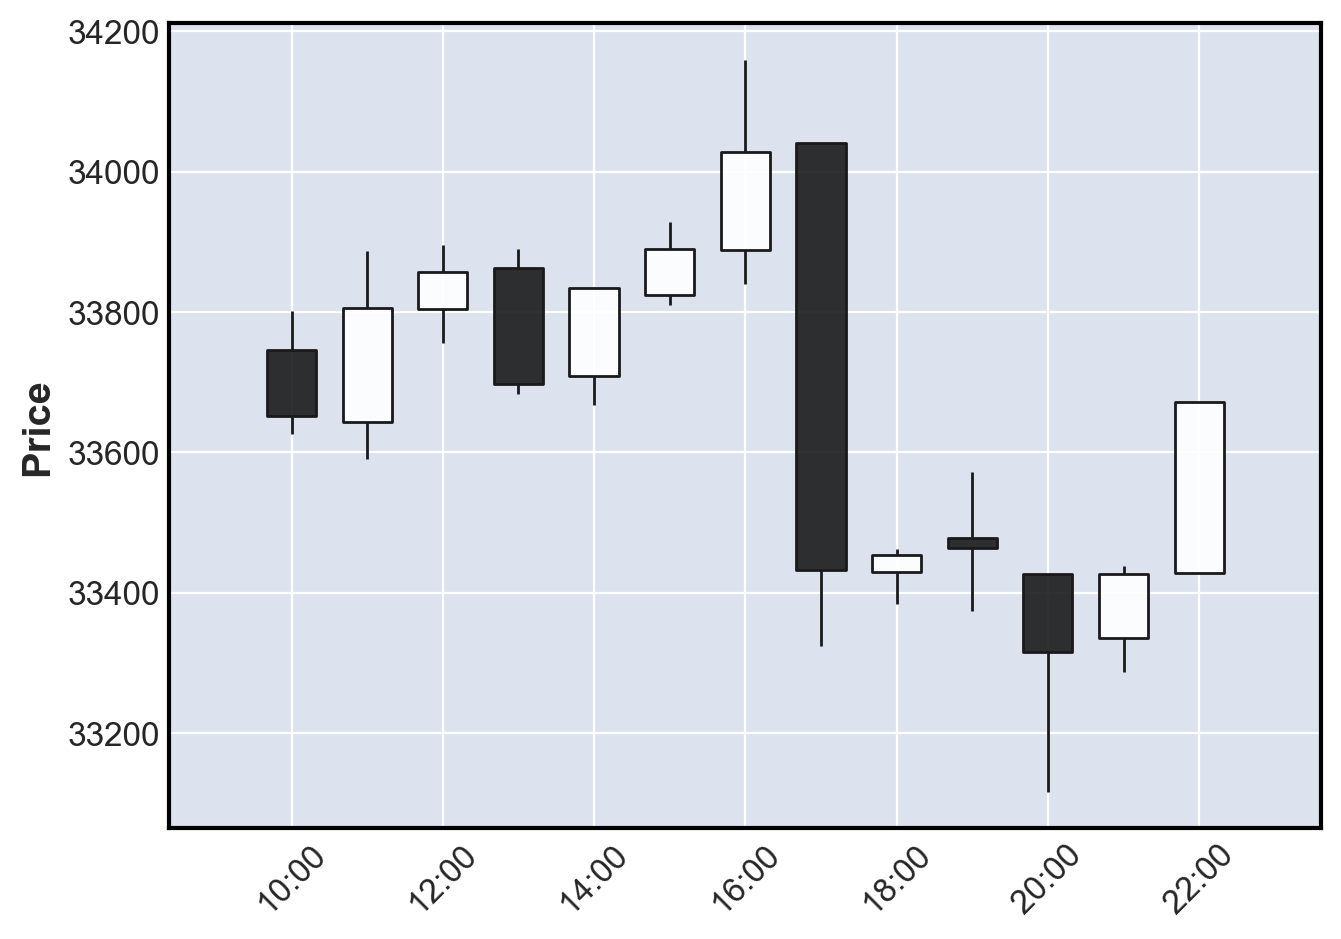

In [27]:
mpf.plot(df["2021-07-10 10:00:00":"2021-07-10 23:00:00"], 
         type="candle")

### There's more

1. Get all available pattern names:

In [28]:
candle_names = talib.get_function_groups()["Pattern Recognition"]

2. Iterate over the list of patterns and try identifying them all:

In [29]:
for candle in candle_names:
    df[candle] = getattr(talib, candle)(df["Open"], df["High"], 
                                        df["Low"], df["Close"])

3. Inspect the summary statistics of the patterns:

In [30]:
with pd.option_context("display.max_rows", len(candle_names)):
    display(df[candle_names].describe().transpose().round(2))

,count,mean,std,min,25%,50%,75%,max
CDL2CROWS,6454.0,-0.11,3.29,-100.0,0.0,0.0,0.0,0.0
CDL3BLACKCROWS,6454.0,-0.06,2.49,-100.0,0.0,0.0,0.0,0.0
CDL3INSIDE,6454.0,0.03,10.99,-100.0,0.0,0.0,0.0,100.0
CDL3LINESTRIKE,6454.0,0.08,6.70,-100.0,0.0,0.0,0.0,100.0
CDL3OUTSIDE,6454.0,0.26,23.39,-100.0,0.0,0.0,0.0,100.0
CDL3STARSINSOUTH,6454.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
CDL3WHITESOLDIERS,6454.0,0.19,4.31,0.0,0.0,0.0,0.0,100.0
CDLABANDONEDBABY,6454.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
CDLADVANCEBLOCK,6454.0,-1.30,11.33,-100.0,0.0,0.0,0.0,0.0
CDLBELTHOLD,6454.0,-0.20,42.63,-100.0,0.0,0.0,0.0,100.0


4. Locate and plot the "Evening Star" pattern:

In [32]:
df[df["CDLEVENINGSTAR"]  == -100].head()

,Open,High,Low,Close,Adj Close,Volume,3_line_strike,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,...,CDLSPINNINGTOP,CDLSTALLEDPATTERN,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS
2021-05-27 15:00:00+00:00,40093.203125,40122.562500,39553.105469,39742.800781,39742.800781,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,100
2021-06-06 22:00:00+00:00,35978.894531,35978.894531,35304.582031,35581.562500,35581.562500,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-06-11 06:00:00+00:00,37033.656250,37033.656250,36509.593750,36509.593750,36509.593750,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-06-13 02:00:00+00:00,35830.812500,35880.605469,35488.949219,35488.949219,35488.949219,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-06-17 16:00:00+00:00,39027.250000,39027.250000,38350.273438,38486.457031,38486.457031,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


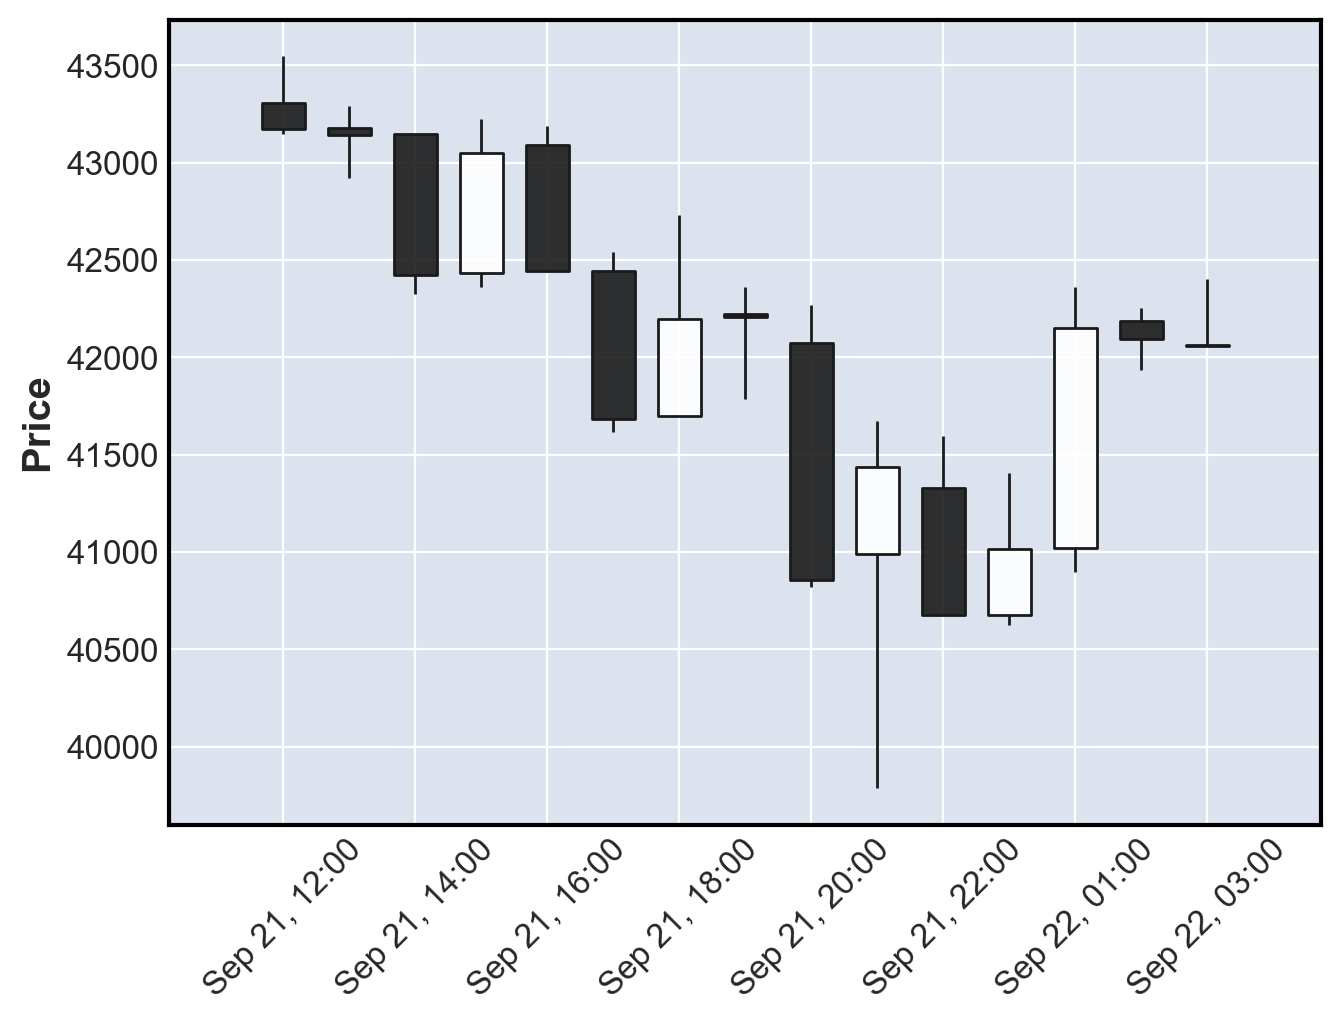

In [33]:
mpf.plot(df["2021-09-21 12:00:00":"2021-09-22 03:00:00"], type="candle")